# Нормализация по мини-батчам

## Пример работы сети без нормализации

In [1]:
import os, shutil
import keras
from keras import layers, models, optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
base_dir = 'C:\\Users\\Admin\\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
base_model_history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6932 - acc: 0.5235 - val_loss: 0.6585 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6595 - acc: 0.6155 - val_loss: 0.6888 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 6s 61ms/step - loss: 0.6171 - acc: 0.6750 - val_loss: 0.6114 - val_acc: 0.6270
Epoch 4/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5762 - acc: 0.7005 - val_loss: 0.6386 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 6s 61ms/step - loss: 0.5359 - acc: 0.7245 - val_loss: 0.6424 - val_acc: 0.7010
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.5029 - acc: 0.7580 - val_loss: 0.5956 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 6s 61ms/step - loss: 0.4754 - acc: 0.7705 - val_loss: 0.5350 - val_acc: 0.6990
Epoch 8/30
100/100 [==============================] - 6s 62ms/step -

## Работа аналогичной сети с нормализацией по мини-батчам

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), use_bias=False, input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), use_bias=False))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, use_bias=False))
model.add(layers.Activation("relu"))

model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      864       
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18432     
_________________________________________________________________
batch_normalization_2 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 64)       

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 150ms/step - loss: 0.8716 - acc: 0.6000 - val_loss: 0.9720 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 14s 143ms/step - loss: 0.5544 - acc: 0.7290 - val_loss: 0.6513 - val_acc: 0.5040
Epoch 3/30
100/100 [==============================] - 14s 144ms/step - loss: 0.4460 - acc: 0.7850 - val_loss: 1.1749 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 14s 143ms/step - loss: 0.3763 - acc: 0.8305 - val_loss: 0.5076 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 14s 143ms/step - loss: 0.2907 - acc: 0.8730 - val_loss: 0.6438 - val_acc: 0.7000
Epoch 6/30
100/100 [==============================] - 14s 143ms/step - loss: 0.2278 - acc: 0.9080 - val_loss: 0.8827 - val_acc: 0.5780
Epoch 7/30
100/100 [==============================] - 14s 143ms/step - loss: 0.1935 - acc: 0.9245 - val_loss: 0.6855 - val_acc: 0.7160
Epoch 8/30
100/100 [==============================] - 1

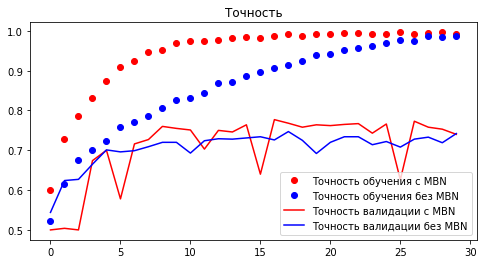

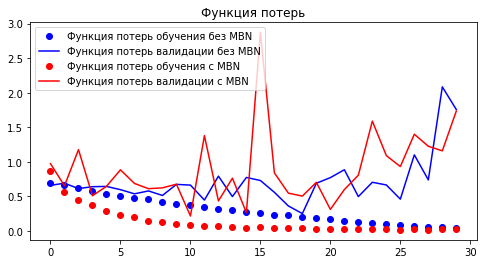

In [18]:
base_acc = base_model_history.history['acc']
base_val_acc = base_model_history.history['val_acc']
base_loss = base_model_history.history['loss']
base_val_loss = base_model_history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(8,4))
plt.plot(epochs, acc, 'bo', color='red', label='Точность обучения с MBN')
plt.plot(epochs, base_acc, 'bo', color='blue', label='Точность обучения без MBN')
plt.plot(epochs, val_acc, 'b', color='red', label='Точность валидации с MBN')
plt.plot(epochs, base_val_acc, 'b', color='blue', label='Точность валидации без MBN')
plt.title('Точность')
plt.legend()

plt.figure(figsize=(8,4))
plt.plot(epochs, base_loss, 'bo', color='blue', label='Функция потерь обучения без MBN')
plt.plot(epochs, base_val_loss, 'b', color='blue', label='Функция потерь валидации без MBN')
plt.plot(epochs, loss, 'bo', color='red', label='Функция потерь обучения с MBN')
plt.plot(epochs, val_loss, 'b', color='red', label='Функция потерь валидации с MBN')
plt.title('Функция потерь')
plt.legend()

plt.show()